Part1.
建立模型 CNN+Dense 分類 mnist 資料及
訓練完成後將儲存模型

In [1]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [2]:
# 載入 mnist
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
from keras.utils import to_categorical

In [4]:
# 處理 label, one hot encoding
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [5]:
# 處理 input, 像素調整至0~1, 調整shape
x_train_norm = x_train / 255
x_train_norm = x_train_norm.reshape(60000, 28, 28, 1)
x_test_norm = x_test / 255
x_test_norm = x_test_norm.reshape(10000, 28, 28, 1)

In [6]:
from keras.layers import Convolution2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

In [7]:
# 建立一個 Conv + MaxPolling 的模型
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
# 特徵擷取之後接上全連接層, 輸出分成十類
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [9]:
# 先設定訓練 e=20個epochs, 切出20%作為validation, 觀察訓練結果後再調整e
e = 3
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train_norm, y_train_ohe,
         batch_size=32, epochs=e, verbose=1, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 30s 629us/step - loss: 0.1816 - accuracy: 0.9440 - val_loss: 0.0584 - val_accuracy: 0.9827
Epoch 2/3
48000/48000 [==============================] - 31s 648us/step - loss: 0.0537 - accuracy: 0.9824 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 3/3
48000/48000 [==============================] - 35s 733us/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0527 - val_accuracy: 0.9848


In [10]:
# 取出訓練結果
history.history.keys()
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
vaaccl_loss = history.history['accuracy']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

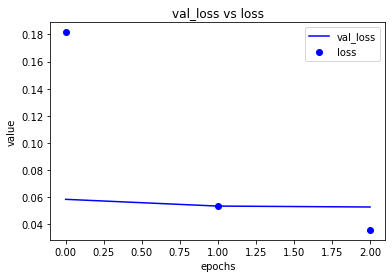

In [12]:
# 畫出val_loss 與 loss關係圖, 找出overfitting的epochs後調整e重新訓練
plt.title('val_loss vs loss')
plt.xlabel('epochs')
plt.ylabel('value')
plt.plot(range(0, 3), val_loss, 'b', label='val_loss')
plt.plot(range(0, 3), loss, 'bo', label='loss')
plt.legend()

In [13]:
# 評估模型 evaluate 回傳為 loss, acc
evaluate = model.evaluate(x_test_norm, y_test_ohe)
print('loss:', evaluate[0])
print('acc:', evaluate[1])
# 驗證測試集
result = model.predict_classes(x_test_norm)
print(result)

10000/10000 [==============================] - 1s 148us/step
loss: 0.04695998474867083
acc: 0.9853000044822693
[7 2 1 ... 4 5 6]


In [14]:
# 儲存模型
model.save('model.h5')

Part2.
載入模型測試 (驗證剛才存下來的模型是否一致)

In [15]:
from keras.models import load_model

In [16]:
# 載入模型
model_load = load_model('model.h5')
model_load.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [17]:
# 載入mnist,拿測試集測試看看是否跟一開始訓練一樣
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = load_data()
x_test_norm = x_test / 255
x_test_norm = x_test_norm.reshape(10000, 28, 28, 1)
y_test_ohe = to_categorical(y_test)

In [18]:
# 評估模型 evaluate 回傳為 loss, acc
evaluate = model_load.evaluate(x_test_norm, y_test_ohe)
print('loss:', evaluate[0])
print('acc:', evaluate[1])
# 驗證測試集
result = model_load.predict_classes(x_test_norm)
print(result)

10000/10000 [==============================] - 2s 154us/step
loss: 0.04695998474867083
acc: 0.9853000044822693
[7 2 1 ... 4 5 6]


In [19]:
model_load.predict_classes(x_test_norm)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Part3.
載入測試集 將某張圖片以numpy儲存

In [20]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

(-0.5, 27.5, 27.5, -0.5)

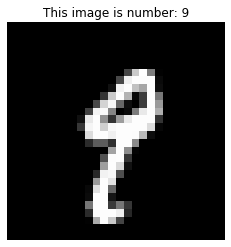

In [21]:
# 顯示測試集中某張 num=0~9999
num = 78
plt.title('This image is number: ' + str(y_test[num]))
plt.imshow(x_test[num], cmap='gray')
plt.axis('off')

In [22]:
import numpy as np

In [23]:
# 將測試集中某張直接以numpy存檔
np.save('x_test', x_test[num])

Part4.
載入模型 讀取圖片 進行預測

In [24]:
import numpy as np

In [25]:
# 讀取
test = np.load('x_test.npy')
test.shape

(28, 28)

In [26]:
# input前處理
test = test / 255
test = test.reshape(1, 28, 28, 1)
test.shape

(1, 28, 28, 1)

In [27]:
from keras.models import load_model

In [28]:
# 預測
model_load = load_model('model.h5')
pred = model_load.predict_classes(test)
pred

array([9], dtype=int64)